# Analyzing the Online Shopper's Purchasing Intention

Online Shoppers Purchasing Intention Dataset is from UCI.
The dataset consists of 10 numerical and 8 categorical attributes. 
The 'Revenue' attribute can be used as the class label. 

"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another. The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

The content of this analysis is to focus on performing univariate, bivariate analysis and
implement clustering and make recommendations based on the predictions.

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("online_shoppers_intention.csv")

In [3]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [13]:
df.tail()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False
12329,0,0.0,0,0.0,3,21.250000,0.000000,0.066667,0.000000,0.0,Nov,3,2,1,2,New_Visitor,True,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [5]:
# Checking for missing values
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

## Exploratory Data Analysis

## Univariate Analysis

#### Analyze each feature (column of a DataFrame) and try to uncover the pattern or distribution of the data

#### Traffic Type Column

Analyze Traffic Type Column is to determine what amount of site traffic is accounted for by direct visitors 

/opt/anaconda3/envs/datamining/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


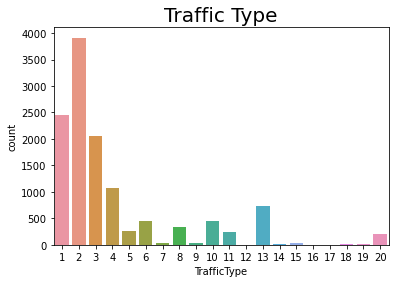

In [22]:
sns.countplot(df['TrafficType'])
plt.title('Traffic Type', fontsize = 20)
plt.show()

In [23]:
df['TrafficType'].value_counts(normalize=True)

2     0.317356
1     0.198783
3     0.166423
4     0.086699
13    0.059854
10    0.036496
6     0.036010
8     0.027818
5     0.021087
11    0.020032
20    0.016058
9     0.003406
7     0.003244
15    0.003082
19    0.001379
14    0.001054
18    0.000811
16    0.000243
12    0.000081
17    0.000081
Name: TrafficType, dtype: float64

From the results above, we can see that Traffic Type 2 has the highest number and Traffic Type 2, 1, 3, and 4 account for the majority of the web traffic.

#### Weekend column

Analyze Weekend Column is to determine whether customers are more active on weekends or weekdays

/opt/anaconda3/envs/datamining/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


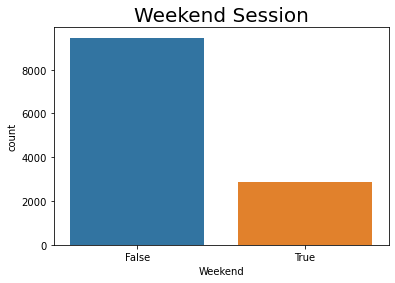

In [24]:
sns.countplot(df['Weekend'])
plt.title('Weekend Session', fontsize = 20)
plt.show()

In [25]:
df['Weekend'].value_counts()

False    9462
True     2868
Name: Weekend, dtype: int64

In [26]:
df['Weekend'].value_counts(normalize=True)

False    0.767397
True     0.232603
Name: Weekend, dtype: float64

From the above results, we can see that more customers visit during weekdays than weekend days

#### Visitor Type Column

Analyze Visitor Type Column is to determine which visitor type is most frequent (New_Visitor, Returning_Visitor, or Others)

/opt/anaconda3/envs/datamining/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


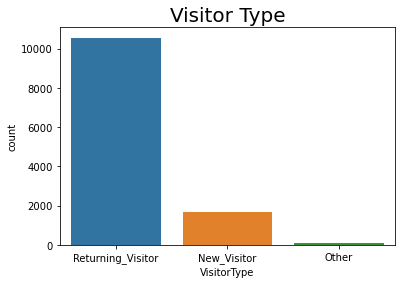

In [19]:
sns.countplot(df['VisitorType'])
plt.title('Visitor Type', fontsize = 20)
plt.show()

In [20]:
df['VisitorType'].value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

In [21]:
df['VisitorType'].value_counts(normalize=True)

Returning_Visitor    0.855718
New_Visitor          0.137388
Other                0.006894
Name: VisitorType, dtype: float64

From the results above, we can see that the number of returning customers is higher than that of new visitors and other. It means the website is attracted by customers and they came back again. This is a good signal. 

#### The Revenue Column: Baseline Conversion Rate

/opt/anaconda3/envs/datamining/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


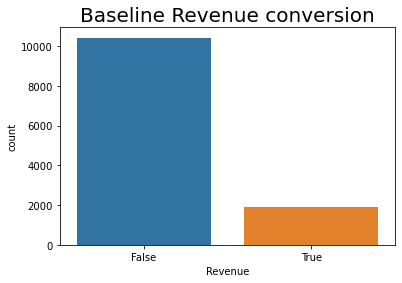

In [10]:
sns.countplot(df['Revenue'])
plt.title('Baseline Revenue conversion', fontsize = 20)
plt.show()

In [11]:
df['Revenue'].value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64


In [12]:
df['Revenue'].value_counts(normalize=True)

False    0.845255
True     0.154745
Name: Revenue, dtype: float64


From the results above, we can see that False has a higher number count than True. There are 1,908 customers making a purchase while 10,422 customers didn't make a purchase. 

In [17]:
print ('Therefore, the coversion rate is', 1908/12330 * 100,'%')

Therefore, the coversion rate is 15.474452554744525 %


#### Region column

Analyze Region columns is to see which region has the highest number of customers visiting the website

/opt/anaconda3/envs/datamining/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


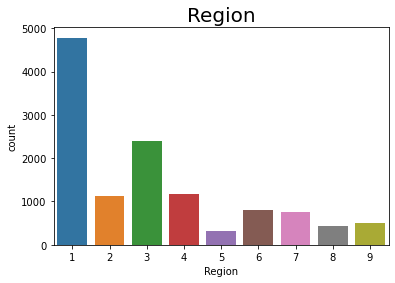

In [28]:
sns.countplot(df['Region'])
plt.title('Region', fontsize = 20)
plt.show()

In [29]:
df['Region'].value_counts()

1    4780
3    2403
4    1182
2    1136
6     805
7     761
9     511
8     434
5     318
Name: Region, dtype: int64

In [30]:
df['Region'].value_counts(normalize=True)

1    0.387672
3    0.194891
4    0.095864
2    0.092133
6    0.065288
7    0.061719
9    0.041444
8    0.035199
5    0.025791
Name: Region, dtype: float64

From the result above, we can see that Region 1 has the highest number of customers visiting the website. And we can see that region 1 and 3 are the most potential area because they account for more than 50% of online sessions. 

#### Brownser column

Analyze the Brownser column to determine which type of browser is used by visitors

/opt/anaconda3/envs/datamining/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


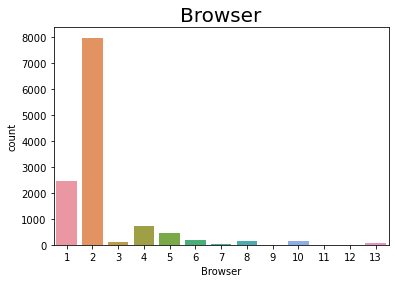

In [31]:
sns.countplot(df['Browser'])
plt.title('Browser', fontsize = 20)
plt.show()

In [32]:
df['Browser'].value_counts()

2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64

In [33]:
df['Browser'].value_counts(normalize=True)

2     0.645661
1     0.199676
4     0.059692
5     0.037875
6     0.014112
10    0.013220
8     0.010949
3     0.008516
13    0.004947
7     0.003974
12    0.000811
11    0.000487
9     0.000081
Name: Browser, dtype: float64

From the result above, we can see that Brownser 2 has the highest number of visitors visiting the website.

#### Operating System column

Analyze Operating System column to determine which Operating System type contributes the most to website traffic

/opt/anaconda3/envs/datamining/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


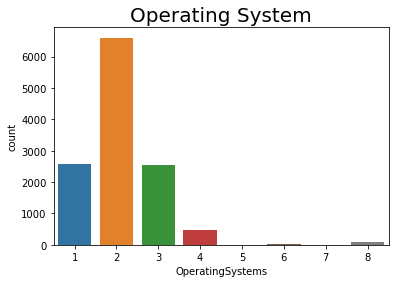

In [34]:
sns.countplot(df['OperatingSystems'])
plt.title('Operating System', fontsize = 20)
plt.show()

In [35]:
df['OperatingSystems'].value_counts()

2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64

In [36]:
df['OperatingSystems'].value_counts(normalize = True)

2    0.535361
1    0.209651
3    0.207218
4    0.038767
8    0.006407
6    0.001541
7    0.000568
5    0.000487
Name: OperatingSystems, dtype: float64

From the result above, we can see that Operating System 2 contributes the most to the website traffic

#### Administrative column

/opt/anaconda3/envs/datamining/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


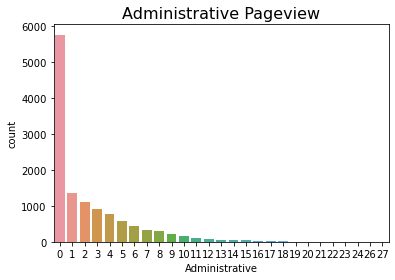

In [38]:
sns.countplot(df['Administrative'])
plt.title('Administrative Pageview', fontsize = 16)
plt.show()

Administrative pages on a website where the content is being added to the site. We can see that visitors tend to visit page 0 the most frequently.

#### Informational column

In [ ]:
The information pages of a site are the pages where the direct information is presented

/opt/anaconda3/envs/datamining/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


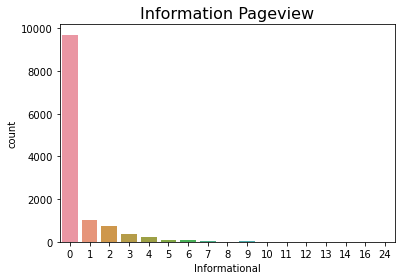

In [40]:
sns.countplot(df['Informational'])
plt.title('Information Pageview', fontsize = 16)
plt.show()

In [41]:
df['Informational'].value_counts(normalize=True)

0     0.786618
1     0.084428
2     0.059043
3     0.030819
4     0.018005
5     0.008029
6     0.006326
7     0.002920
9     0.001217
8     0.001135
10    0.000568
12    0.000406
14    0.000162
11    0.000081
13    0.000081
24    0.000081
16    0.000081
Name: Informational, dtype: float64

From the result above, we can see that Information page 0 has the highest number of visitors. And 79% of users are visiting pages 0 and 1.

#### Special Day column

Analyze Special Day to know whether special days (Valentine's Day) impact the number of visitors visiting the website.

/opt/anaconda3/envs/datamining/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


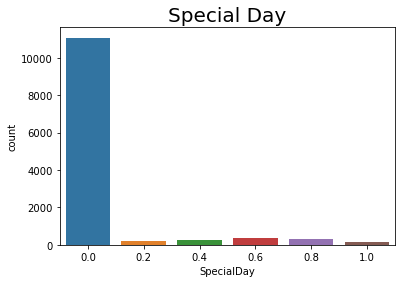

In [43]:
sns.countplot(df['SpecialDay'])
plt.title('Special Day', fontsize = 20)
plt.show()

In [44]:
df['SpecialDay'].value_counts(normalize=True)

0.0    0.898540
0.6    0.028467
0.8    0.026358
0.4    0.019708
0.2    0.014436
1.0    0.012490
Name: SpecialDay, dtype: float64

From the result above, we can see that special days have no impact on the number of visitors to the website.

# Bivariate Analysis

Bivariate analysis is performed between two variables to look at their relationship.
Firstly, analyze the realtionship between Revenue with other variables.

#### Revenue Versus Visitor Type

/opt/anaconda3/envs/datamining/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


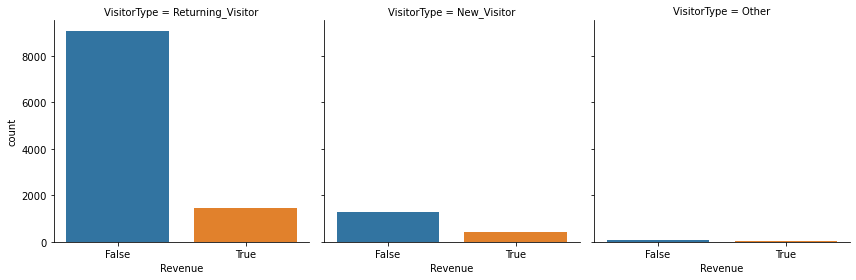

In [52]:
a = sns.catplot("Revenue", col="VisitorType", col_wrap=3,\
                data=df,kind="count", height=4, aspect=1)
plt.show()

From the chart above, we can see more revenue is for returning_visitor than new_visitor and others. Thus, we need to think about how to attract new customers to make the purchase.

#### Revenue Versus Traffic Type

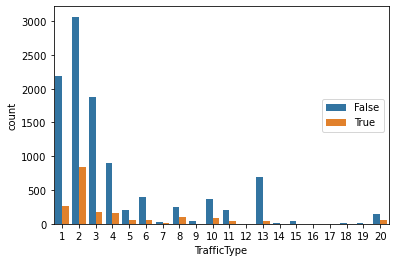

In [56]:
sns.countplot(x="TrafficType", hue="Revenue", data=df)
plt.legend(loc='right')
plt.show()

From the plot, we can see that more revenue conversion is for web traffic generated from source 2 then source 1.

#### Revenue versus Region

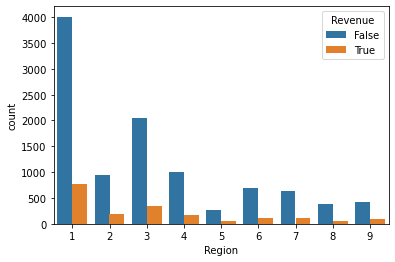

In [54]:
sns.countplot(x="Region", hue="Revenue", data=df)
plt.show()

From the plot, we can see that region 1 accounts for most Revenue, and then region 3 the second most.

#### Revenue versus Browser

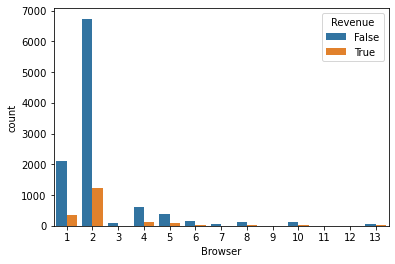

In [57]:
sns.countplot(x="Browser", hue="Revenue", data=df)
plt.show()

From the plot, we can see that the most Revenue was generated from Browser 2 and then Browser 1.

#### Revenue versus OperatingSystems

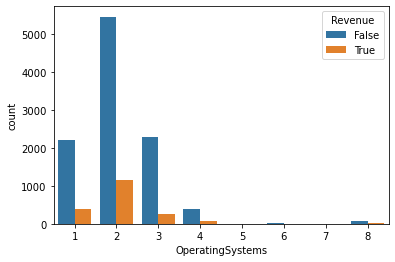

In [58]:
sns.countplot(x="OperatingSystems", hue="Revenue", data=df)
plt.show()

We can see, the most happened with Operating System 2 than the other types.

#### Revenue versus Months

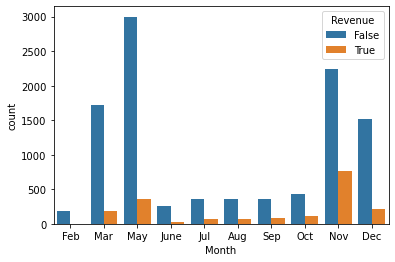

In [60]:
sns.countplot(x="Month", hue="Revenue",\
              data=df,order=['Feb','Mar','May','June','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.show()

We can see the most visitors happened in May but the most number of purchases happened in November.

# Analyze Linear Relationships

#### Page Value versus Bounce Rate

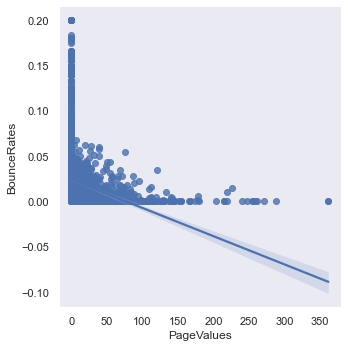

In [64]:
sns.set(style="dark")
ax = sns.lmplot(x="PageValues", y="BounceRates" , data=df)

We can see there is a negative correlation between page value and bounce rate. When the page value increases, the bounce rate decreases. Thus, to increase the probability of a customer purchasing, we need to improve the page value.

#### Page Value versus Exit Rate

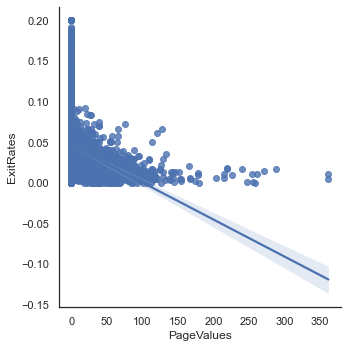

In [65]:
sns.set(style="white")
ax = sns.lmplot(x="PageValues", y="ExitRates" , data=df)

We can see there is a negative correlation between page value and exit rate. When the page value increases, the exit rate decreases. Thus, to increase the probability of a customer purchasing, we need to improve the page value.

#### Bounce Rate versus Exit Rate

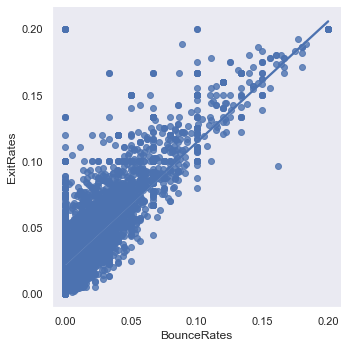

In [63]:
sns.set(style="dark")
ax = sns.lmplot(x="BounceRates", y="ExitRates", data=df)

We can see, there is a positive correlation between the bounce rate and the exit rate. When bounce rate inceases, the exit rate also increases.

#### Analyze the impact of Information Page Views and Information Pageview Duration on Revenue

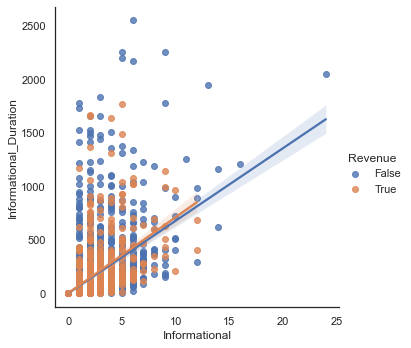

In [67]:
sns.set(style="white")
ax = sns.lmplot(x="Informational", y="Informational_Duration",\
                hue='Revenue', data=df)

We can see, there is a positive correlation between Information and information duration. When information inceases, the imformation duration also increases.

And we can see the informational pageviews didn't have more effect on revenue because of customers who made purchases had fewer informational duration.

# Clustering

In [69]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split

In [78]:
from sklearn.metrics import silhouette_score

#### Performing K-means Clustering for Informational Duration versus Bounce Rate

In [70]:
df1 = df.iloc[:, [3, 6]].values

In [79]:
for i in range(10):
    kmeans1 = KMeans(n_clusters=(i+2)).fit(df1)
    print(silhouette_score(df1,kmeans1.labels_),'-',i+2,' Clusters','\n')

0.9429450915588239 - 2  Clusters 

0.9185341796308738 - 3  Clusters 

0.913065728126124 - 4  Clusters 

0.9044849252448495 - 5  Clusters 

0.9000253723619498 - 6  Clusters 

0.9005006808138118 - 7  Clusters 

0.9004268316458565 - 8  Clusters 

0.8992609787820598 - 9  Clusters 

0.8988902284542976 - 10  Clusters 

0.8984370671102363 - 11  Clusters 



We can see that k=2 is the optimum value for clustering.

In [80]:
km = KMeans(n_clusters = 2, init = 'k-means++', \
            max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(df1)

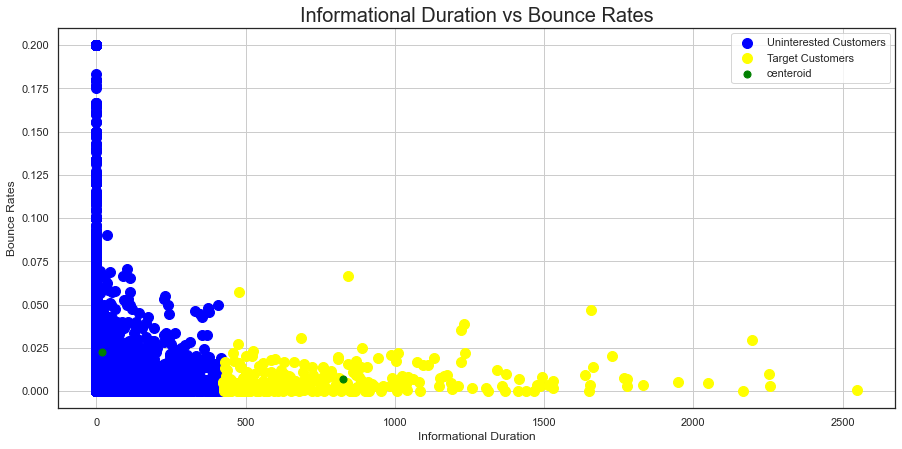

In [84]:
plt.scatter(df1[y_means == 0, 0], df1[y_means == 0, 1], s = 100, \
            c = 'blue', label = 'Uninterested Customers')
plt.scatter(df1[y_means == 1, 0], df1[y_means == 1, 1], s = 100, \
            c = 'yellow', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], \
            s = 50, c = 'green' , label = 'centeroid')
plt.title('Informational Duration vs Bounce Rates', fontsize = 20)
plt.grid()
plt.xlabel('Informational Duration')
plt.ylabel('Bounce Rates')
plt.legend()
plt.show()

We can see that our target customers spend around 850 seconds on average on the Information page.

#### Performing K-means Clustering for Administrative Pageview Duration versus Bounce Rate

In [85]:
df2 = df.iloc[:, [1, 6]].values

In [86]:
for i in range(10):
    kmeans1 = KMeans(n_clusters=(i+2)).fit(df2)
    print(silhouette_score(df1,kmeans1.labels_),'-',i+2,' Clusters','\n')

0.6319578925777527 - 2  Clusters 

0.514241089100298 - 3  Clusters 

0.43531832686991717 - 4  Clusters 

0.2976814630878178 - 5  Clusters 

0.2760190642754135 - 6  Clusters 

0.2027588561243939 - 7  Clusters 

0.14946822267497165 - 8  Clusters 

0.13930881249725918 - 9  Clusters 

0.14513055170272401 - 10  Clusters 

0.09722041335227351 - 11  Clusters 



In [87]:
km = KMeans(n_clusters = 2, init = 'k-means++', \
            max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(df2)

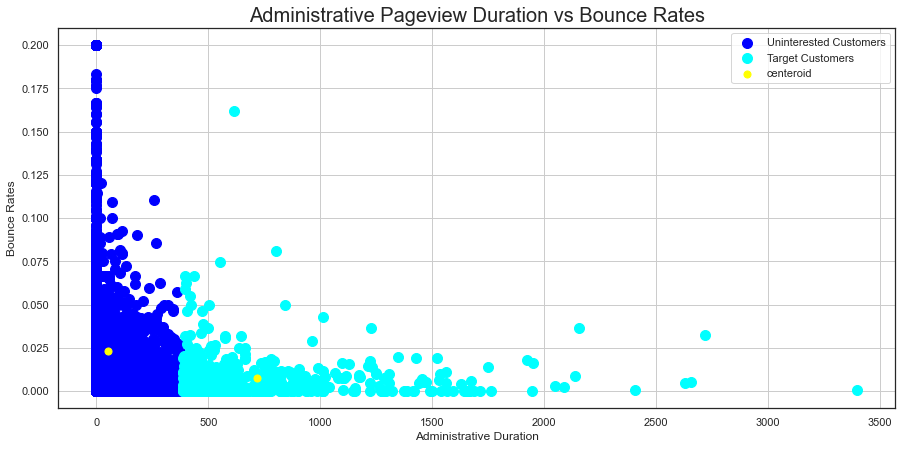

In [89]:
plt.scatter(df2[y_means == 0, 0], df2[y_means == 0, 1], s = 100, \
            c = 'blue', label = 'Uninterested Customers')
plt.scatter(df2[y_means == 1, 0], df2[y_means == 1, 1], s = 100, \
            c = 'cyan', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], \
            s = 50, c = 'yellow' , label = 'centeroid')
plt.title('Administrative Pageview Duration vs Bounce Rates', fontsize = 20)
plt.grid()
plt.xlabel('Administrative Duration')
plt.ylabel('Bounce Rates')
plt.legend()
plt.show()

We can see that the uninterested customer spends less time in administrative pages compared with the target customers, who spend around 750 seconds on the administrative page before exiting.

# Conclusion

The number of returning customers to the website is high but the conversion rate is low. Thus, to increase the probability of a customer purchasing, we need to improve the page value as well as attract new customers to make the purchase.